**STEP 1 : IMPORT LIBRARIES AND LOAD DATA**

In [1]:
#import libraries
import warnings
warnings.simplefilter('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
!pip install category_encoders
from category_encoders import TargetEncoder
import category_encoders as ce
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay,accuracy_score
from sklearn.model_selection import KFold
from IPython.display import display, Markdown
from sklearn.metrics import roc_auc_score, roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
!pip install streamlit
import streamlit as st
import joblib

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


In [21]:
#load data
df=pd.read_csv("transactions-2025-05-19.csv")
df

,TRANSACTION_NUMBER,INSTANCE_DATE,GROUP_EN,PROCEDURE_EN,IS_OFFPLAN_EN,IS_FREE_HOLD_EN,USAGE_EN,AREA_EN,PROP_TYPE_EN,PROP_SB_TYPE_EN,...,ACTUAL_AREA,ROOMS_EN,PARKING,NEAREST_METRO_EN,NEAREST_MALL_EN,NEAREST_LANDMARK_EN,TOTAL_BUYER,TOTAL_SELLER,MASTER_PROJECT_EN,PROJECT_EN
0,102-11792-2025,2025-05-12 21:10:27,Sales,Sell - Pre registration,Off-Plan,Free Hold,Residential,JUMEIRAH VILLAGE TRIANGLE,Unit,Flat,...,67.91,1 B/R,1,Nakheel Metro Station,Marina Mall,Sports City Swimming Academy,0,0,NaN,THE VYNE RESIDENCES
1,102-11864-2025,2025-05-01 21:09:07,Sales,Sell - Pre registration,Off-Plan,Free Hold,Residential,JUMEIRAH VILLAGE TRIANGLE,Unit,Flat,...,67.91,1 B/R,1,Nakheel Metro Station,Marina Mall,Sports City Swimming Academy,0,0,NaN,THE VYNE RESIDENCES
2,102-12902-2025,2025-04-30 22:07:05,Sales,Sell - Pre registration,Off-Plan,Free Hold,Residential,DUBAI LAND RESIDENCE COMPLEX,Unit,Flat,...,40.52,Studio,1,NaN,NaN,IMG World Adventures,0,0,NaN,Samana Park Meadows
3,102-17904-2025,2025-05-15 22:14:18,Sales,Sell - Pre registration,Off-Plan,Free Hold,Residential,ARJAN,Unit,Flat,...,42.29,Studio,1,Sharaf Dg Metro Station,Mall of the Emirates,Motor City,0,0,NaN,Parkside Boulevard
4,102-22018-2025,2025-05-14 16:01:42,Sales,Sell - Pre registration,Off-Plan,Free Hold,Residential,Al Wasl,Unit,Flat,...,127.29,2 B/R,1,NaN,NaN,NaN,0,0,NaN,Eden House The Park
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12584,9-2846-2025,2025-05-16 10:51:29,Gifts,Grant,Ready,Free Hold,Residential,BUSINESS BAY,Unit,Flat,...,217.58,2 B/R,BM - 83,Business Bay Metro Station,Dubai Mall,Burj Khalifa,0,0,NaN,NaN
12585,9-986-2025,2025-05-14 21:26:52,Gifts,Grant,Ready,Free Hold,Residential,Ras Al Khor Industrial Second,Land,NaN,...,5598.69,NaN,NaN,Creek Metro Station,City Centre Mirdif,Downtown Dubai,0,0,NaN,NaN
12586,93-6-2025,2025-05-01 12:52:13,Sales,Delayed Sell Development,Ready,Non Free Hold,Residential,SILICON OASIS,Unit,Flat,...,79.11,1 B/R,G-195,NaN,NaN,IMG World Adventures,0,0,NaN,AXIS RESIDENCES 1
12587,93-7-2025,2025-05-15 08:32:14,Sales,Delayed Sell Development,Ready,Non Free Hold,Residential,SILICON OASIS,Unit,Flat,...,78.77,1 B/R,G-53,NaN,NaN,IMG World Adventures,0,0,NaN,AXIS RESIDENCES 1


In [3]:
df.tail()

,TRANSACTION_NUMBER,INSTANCE_DATE,GROUP_EN,PROCEDURE_EN,IS_OFFPLAN_EN,IS_FREE_HOLD_EN,USAGE_EN,AREA_EN,PROP_TYPE_EN,PROP_SB_TYPE_EN,...,ACTUAL_AREA,ROOMS_EN,PARKING,NEAREST_METRO_EN,NEAREST_MALL_EN,NEAREST_LANDMARK_EN,TOTAL_BUYER,TOTAL_SELLER,MASTER_PROJECT_EN,PROJECT_EN
12584,9-2846-2025,2025-05-16 10:51:29,Gifts,Grant,Ready,Free Hold,Residential,BUSINESS BAY,Unit,Flat,...,217.58,2 B/R,BM - 83,Business Bay Metro Station,Dubai Mall,Burj Khalifa,0,0,NaN,NaN
12585,9-986-2025,2025-05-14 21:26:52,Gifts,Grant,Ready,Free Hold,Residential,Ras Al Khor Industrial Second,Land,NaN,...,5598.69,NaN,NaN,Creek Metro Station,City Centre Mirdif,Downtown Dubai,0,0,NaN,NaN
12586,93-6-2025,2025-05-01 12:52:13,Sales,Delayed Sell Development,Ready,Non Free Hold,Residential,SILICON OASIS,Unit,Flat,...,79.11,1 B/R,G-195,NaN,NaN,IMG World Adventures,0,0,NaN,AXIS RESIDENCES 1
12587,93-7-2025,2025-05-15 08:32:14,Sales,Delayed Sell Development,Ready,Non Free Hold,Residential,SILICON OASIS,Unit,Flat,...,78.77,1 B/R,G-53,NaN,NaN,IMG World Adventures,0,0,NaN,AXIS RESIDENCES 1
12588,93-8-2025,2025-05-13 14:05:03,Sales,Delayed Sell Development,Ready,Non Free Hold,Residential,SILICON OASIS,Unit,Flat,...,89.92,1 B/R,121,NaN,City Centre Mirdif,IMG World Adventures,0,0,NaN,AXIS RESIDENCES 4


In [4]:
#convert date column
df['INSTANCE_DATE']=pd.to_datetime(df['INSTANCE_DATE'])

In [5]:
#Shape
df.shape

(12589, 22)

In [6]:
#view basic info
print(df.info())
print('--'*25)
print(df.describe())
print('--'*25)
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12589 entries, 0 to 12588
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   TRANSACTION_NUMBER   12589 non-null  object        
 1   INSTANCE_DATE        12589 non-null  datetime64[ns]
 2   GROUP_EN             12589 non-null  object        
 3   PROCEDURE_EN         12589 non-null  object        
 4   IS_OFFPLAN_EN        12589 non-null  object        
 5   IS_FREE_HOLD_EN      12589 non-null  object        
 6   USAGE_EN             12589 non-null  object        
 7   AREA_EN              12589 non-null  object        
 8   PROP_TYPE_EN         12589 non-null  object        
 9   PROP_SB_TYPE_EN      11943 non-null  object        
 10  TRANS_VALUE          12589 non-null  float64       
 11  PROCEDURE_AREA       12589 non-null  float64       
 12  ACTUAL_AREA          12589 non-null  float64       
 13  ROOMS_EN             10320 non-

In [7]:
#target classification
df.value_counts("PROP_TYPE_EN")

PROP_TYPE_EN
Unit        9663
Land        2145
Building     781
Name: count, dtype: int64



**STEP 2 : EXPLORATORY DATA ANALYSIS**

HISTOGRAM

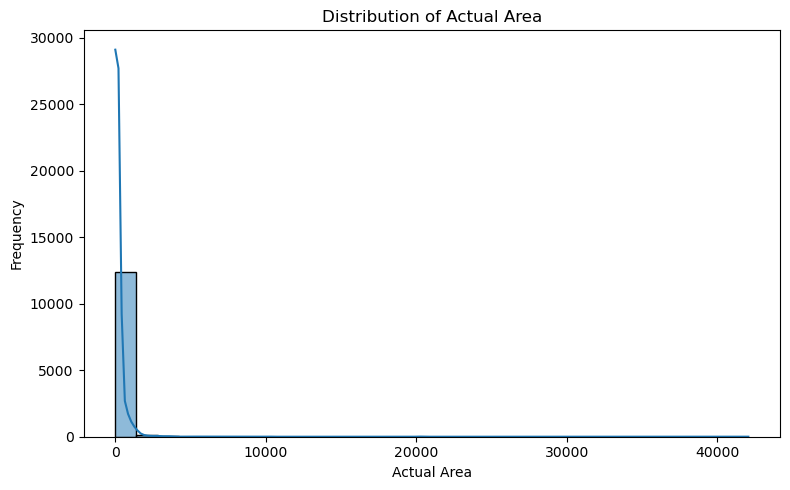

In [8]:
# HISTOGRAM - DISTRIBUTION OF NUMERICAL COLUMN
# Aim: To visualize the distribution of the actual_area (property size)

plt.figure(figsize=(8,5))
sns.histplot(df['ACTUAL_AREA'].dropna(),kde=True,bins=30)
plt.title("Distribution of Actual Area")
plt.xlabel("Actual Area")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

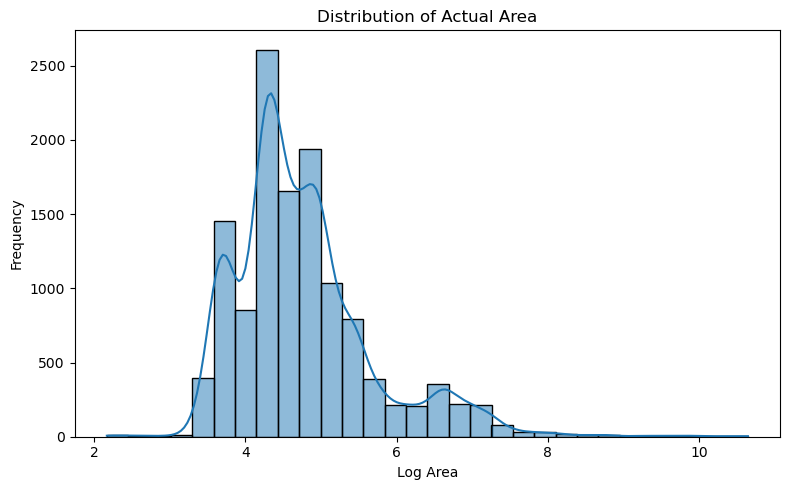

In [9]:
#output:
#1.Most values are clustered on the left (between 0 and 1000 sq.m): most properties are in small size (over 30000 properties)
#2.Right skewed distribution: long tail to the right, indicating very few large propertiess(upto 40,000 sq.m)
#these large values are outliers and can distort model training
#so log transformation is applied to reduce the effect of extreme values

df['Log_Area']=np.log1p(df['ACTUAL_AREA'])  #log1p handles 0 values too

#plot again with Log_Area to get a clearer view

plt.figure(figsize=(8,5))
sns.histplot(df['Log_Area'],kde=True,bins=30)
plt.title("Distribution of Actual Area")
plt.xlabel("Log Area")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

PAIR PLOT

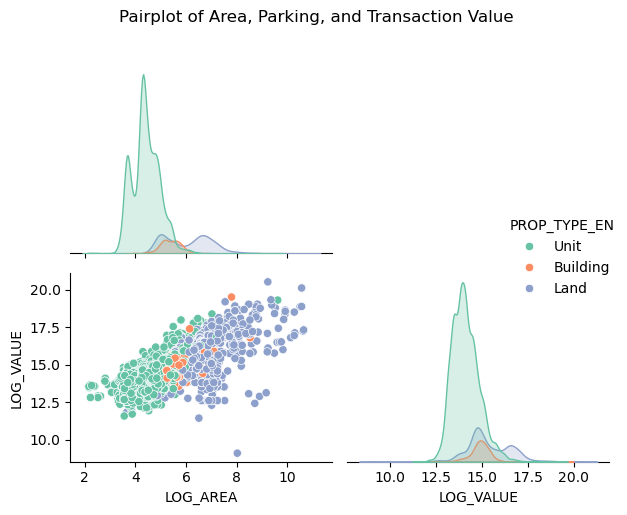

In [10]:
#Pair plot: To visualize relationship between multiple numeric features and how they vary across the target classes

#Select a subset of numeric features + the target
df['PARKING']=df['PARKING'].fillna(0)
plot_df=df[['ACTUAL_AREA','PARKING','TRANS_VALUE','PROP_TYPE_EN']]

#Log transform to manage skewness
plot_df['LOG_AREA']=np.log1p(plot_df['ACTUAL_AREA'])
plot_df['LOG_VALUE']=np.log1p(plot_df['TRANS_VALUE'])

#replce prop_type_en to string
plot_df['PROP_TYPE_EN']=plot_df['PROP_TYPE_EN'].astype(str)

#PAIRPLOT
sns.pairplot(plot_df[['LOG_AREA','PARKING','LOG_VALUE','PROP_TYPE_EN']],hue='PROP_TYPE_EN',palette='Set2',corner =True)
plt.suptitle("Pairplot of Area, Parking, and Transaction Value",y=1.02)
plt.tight_layout()
plt.show()

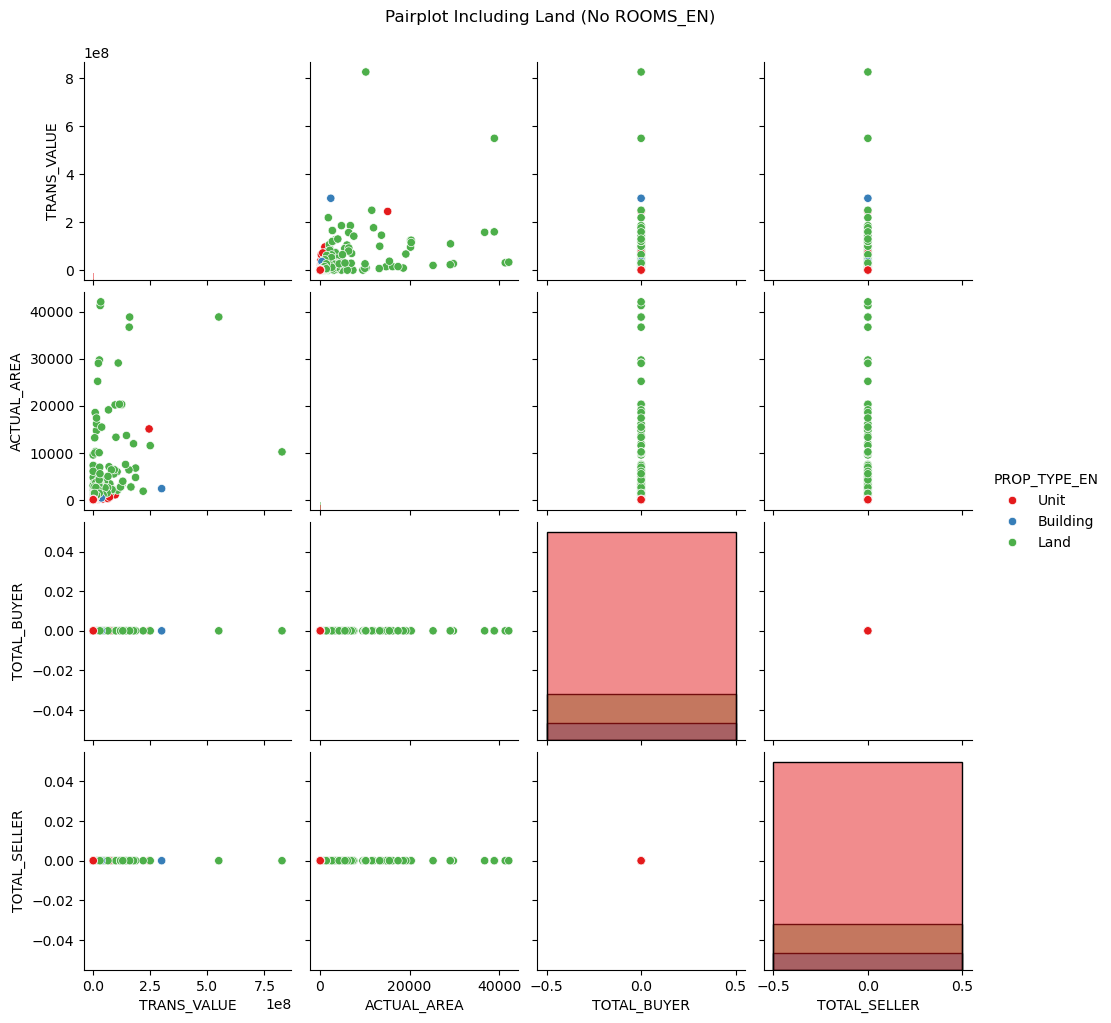

In [11]:
# Select features that exist for all property types (especially Land)
pairplot_df = df[['TRANS_VALUE', 'ACTUAL_AREA', 'TOTAL_BUYER', 'TOTAL_SELLER', 'PROP_TYPE_EN']].copy()

# Ensure numerical types and drop rows with missing values
pairplot_df = pairplot_df.apply(pd.to_numeric, errors='coerce')
pairplot_df['PROP_TYPE_EN'] = df['PROP_TYPE_EN']
pairplot_df.dropna(inplace=True)

# Create the pairplot
sns.pairplot(pairplot_df, hue='PROP_TYPE_EN', palette='Set1', diag_kind='hist')
plt.suptitle("Pairplot Including Land (No ROOMS_EN)", y=1.02)
plt.show()


BOX PLOT

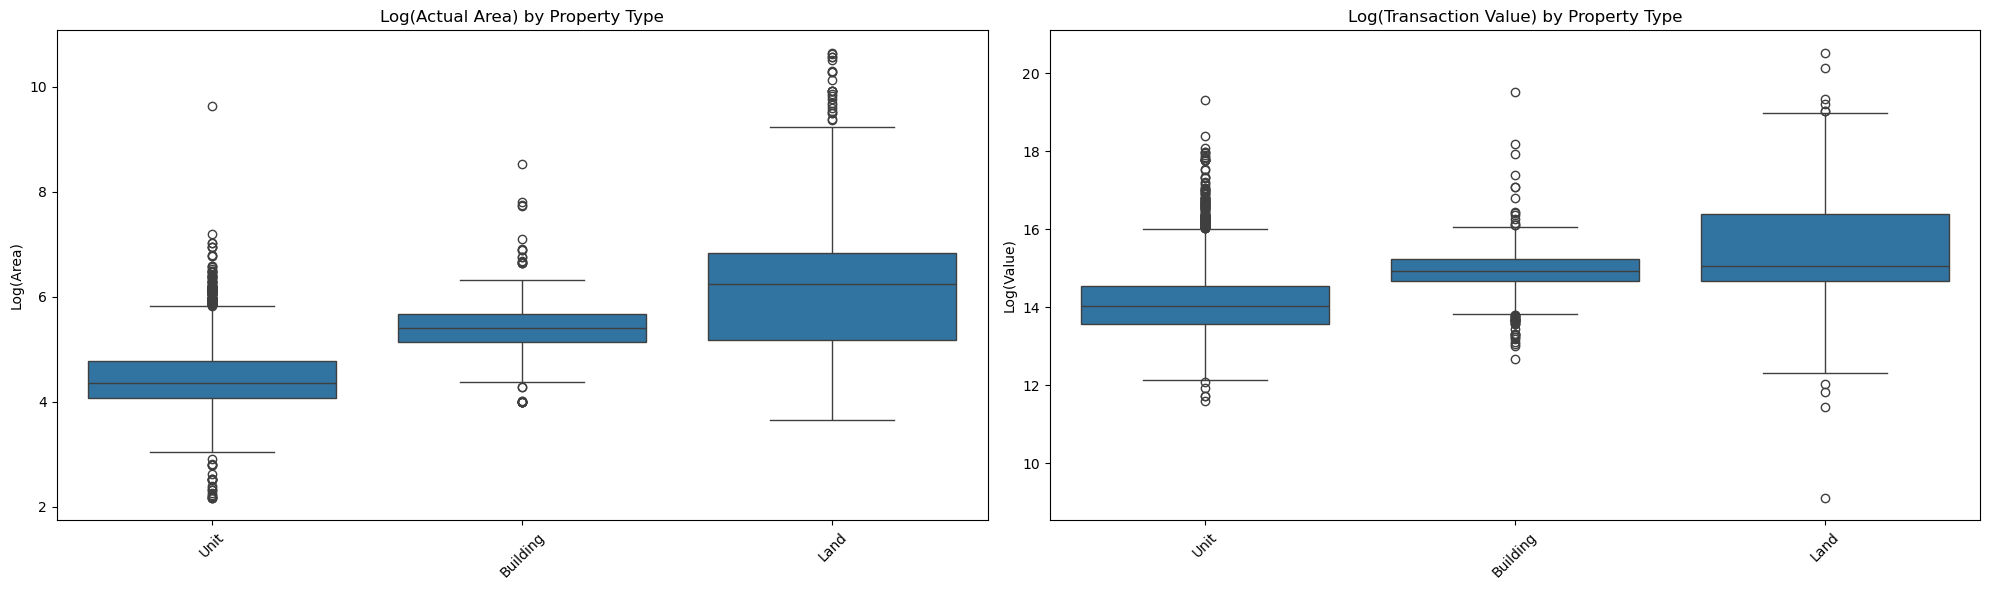

In [12]:
#CREATE SUBPLOTS
fig,axes=plt.subplots(1,2,figsize=(20,6),sharex=False)

#boxplot 1: Log Actual Area
sns.boxplot(data=plot_df, x='PROP_TYPE_EN',y='LOG_AREA', ax=axes[0])
axes[0].set_title('Log(Actual Area) by Property Type')
axes[0].set_xlabel(''); axes[0].set_ylabel('Log(Area)')
axes[0].tick_params(axis='x', rotation=45)

# Boxplot 2: Log Transaction Value
sns.boxplot(data=plot_df, x='PROP_TYPE_EN', y='LOG_VALUE', ax=axes[1])
axes[1].set_title('Log(Transaction Value) by Property Type')
axes[1].set_xlabel(''); axes[1].set_ylabel('Log(Value)')
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

PIVOT PLOT

<Axes: xlabel='USAGE_EN', ylabel='PROP_TYPE_EN'>

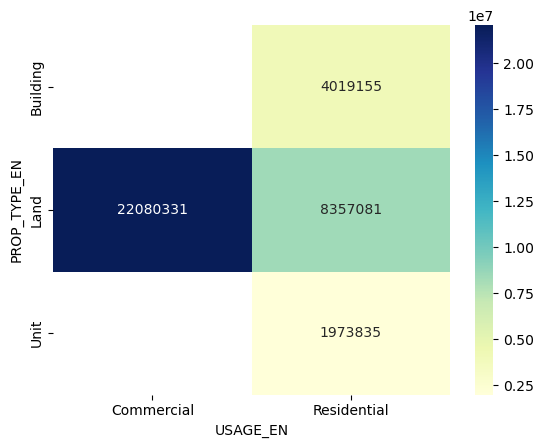

In [13]:
# Create a pivot table
pivot_table = pd.pivot_table(
    df,
    values='TRANS_VALUE',
    index='PROP_TYPE_EN',
    columns='USAGE_EN',
    aggfunc='mean'
)

# Plot the pivot table as a heatmap
sns.heatmap(pivot_table, annot=True, fmt=".0f", cmap="YlGnBu")


CORRELATION HEATMAP

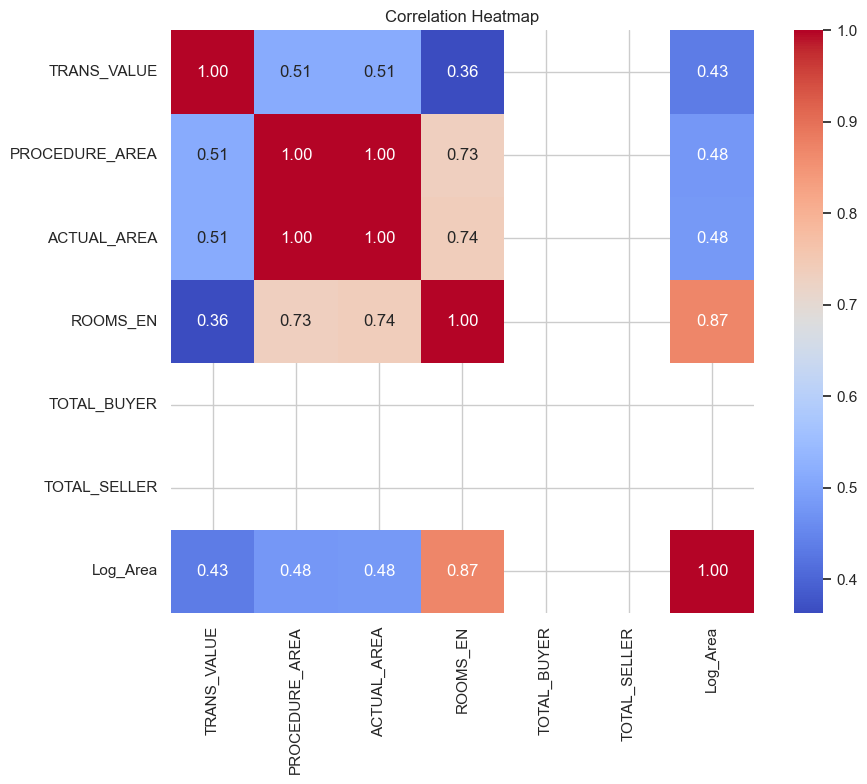

In [14]:
# Make a copy of the original DataFrame to avoid modifying it directly
eda_df = df.copy()

# Extract number of rooms from 'ROOMS_EN' and convert to numeric
eda_df['ROOMS_EN'] = eda_df['ROOMS_EN'].str.extract('(\d+)').astype(float)

# Select only numerical columns for correlation analysis
numerical_cols = eda_df.select_dtypes(include=[np.number]).columns.tolist()

# Compute the correlation matrix
corr_matrix = eda_df[numerical_cols].corr()

# Set the plot style
sns.set(style="whitegrid")

# Create and display the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", square=True)
plt.title("Correlation Heatmap")
plt.tight_layout()
plt.show()


COUNT PLOT

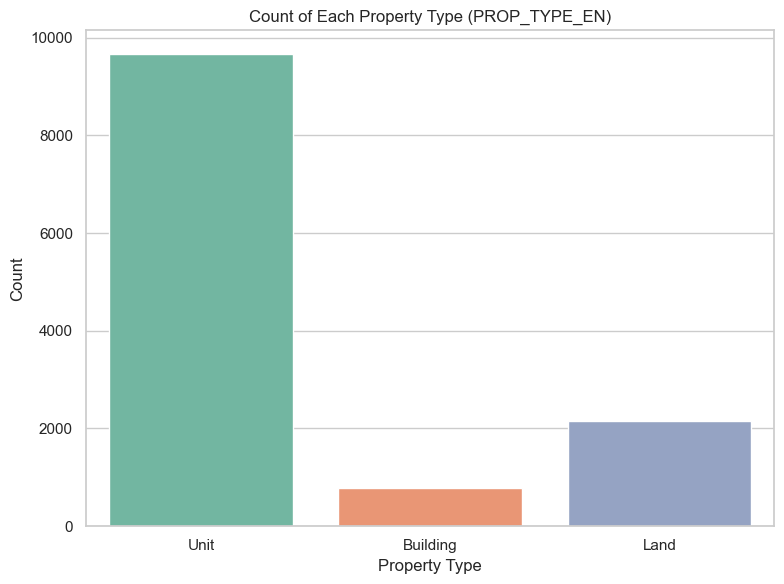

In [15]:
plt.figure(figsize=(8, 6))  # Set plot size
sns.countplot(data=df, x='PROP_TYPE_EN', palette='Set2')  # Create a count plot of PROP_TYPE_EN
plt.title('Count of Each Property Type (PROP_TYPE_EN)')  # Title
plt.xlabel('Property Type')  # X-axis label
plt.ylabel('Count')  # Y-axis label
plt.tight_layout()  # Adjust layout
plt.show()  # Display plot

**STEP 3: DATA PREPROCESSING**

DROP, REMOVE NAN, REMOVE OUTLIERS, ENCODE, SPLIT AND TRAIN

In [16]:
df.drop("Log_Area", axis=1,inplace=True)

In [22]:
!pip install category_encoders
from category_encoders import TargetEncoder
import category_encoders as ce
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Drop irrelevant columns
df.drop(columns=["TRANSACTION_NUMBER", "INSTANCE_DATE", "GROUP_EN", "USAGE_EN","PROCEDURE_AREA","TOTAL_BUYER","TOTAL_SELLER","MASTER_PROJECT_EN"], inplace=True)

# Encode and Separate target
target={'Unit':0, 'Building':1, 'Land':2}
df["PROP_TYPE_EN"]=df["PROP_TYPE_EN"].map(target)

y=df["PROP_TYPE_EN"]
x = df.drop(columns=["PROP_TYPE_EN"])

# Manual mapping for ROOMS_EN
room_mapping = {
    "Studio": 0, "1 B/R": 1, "2 B/R": 2, "3 B/R": 3,
    "4 B/R": 4, "5 B/R": 5, "6 B/R": 6, "7 B/R": 7,
    "8 B/R": 8, "9 B/R": 9, "10 B/R": 10, "Missing": -1
}
x["ROOMS_EN"] = x["ROOMS_EN"].map(room_mapping).fillna(-1)

#label encode IS_OFFPLAN_EN
le = LabelEncoder()
x["IS_OFFPLAN_EN"] = le.fit_transform(x["IS_OFFPLAN_EN"])

#map is freehold
f_map={"Free Hold":1,"Non Free Hold":0}
x["IS_FREE_HOLD_EN"]=x["IS_FREE_HOLD_EN"].map(f_map)

#Encode metro, mall, landmark and project
cols_to_convert = ['NEAREST_METRO_EN', 'NEAREST_MALL_EN', 'NEAREST_LANDMARK_EN', 'PROJECT_EN']
for col in cols_to_convert:
  x[col]=x[col].notna().astype(int)

#fill nan values
x=x.fillna(0)

# Remove outliers (IQR)
def remove_outliers_iqr(data, columns):
    df_clean = data.copy()
    for col in columns:
        Q1 = df_clean[col].quantile(0.25)
        Q3 = df_clean[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df_clean = df_clean[(df_clean[col] >= lower_bound) & (df_clean[col] <= upper_bound)]
    return df_clean

numeric_cols = x.select_dtypes(include=['int64', 'float64']).columns.tolist()
x = remove_outliers_iqr(x, numeric_cols)
y = y.loc[x.index]

# Define columns to target encode
#target_encode_cols = ['PROCEDURE_EN', 'AREA_EN', 'PROP_SB_TYPE_EN', 'PARKING']

# Create and apply the target encoder
#target_encoder = ce.TargetEncoder(cols=target_encode_cols)

#split to train_test
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,stratify=y,random_state=42)

tg1=TargetEncoder()
x_train['PROCEDURE_EN']=tg1.fit_transform(x_train['PROCEDURE_EN'],y_train)
x_test['PROCEDURE_EN']=tg1.transform(x_test['PROCEDURE_EN'])

tg2=TargetEncoder()
x_train['AREA_EN']=tg2.fit_transform(x_train['AREA_EN'],y_train)
x_test['AREA_EN']=tg2.transform(x_test['AREA_EN'])

tg3=TargetEncoder()
x_train['PROP_SB_TYPE_EN']=tg3.fit_transform(x_train['PROP_SB_TYPE_EN'],y_train)
x_test['PROP_SB_TYPE_EN']=tg3.transform(x_test['PROP_SB_TYPE_EN'])

tg4=TargetEncoder()
x_train['PARKING']=tg4.fit_transform(x_train['PARKING'],y_train)
x_test['PARKING']=tg4.transform(x_test['PARKING'])
                                             

# Fit on training data only, then transform both train and test
#x_train[target_encode_cols] = target_encoder.fit_transform(x_train[target_encode_cols], y_train)
#x_test[target_encode_cols] = target_encoder.transform(x_test[target_encode_cols])

Defaulting to user installation because normal site-packages is not writeable


In [23]:
x.dtypes

PROCEDURE_EN            object
IS_OFFPLAN_EN            int32
IS_FREE_HOLD_EN          int64
AREA_EN                 object
PROP_SB_TYPE_EN         object
TRANS_VALUE            float64
ACTUAL_AREA            float64
ROOMS_EN               float64
PARKING                 object
NEAREST_METRO_EN         int32
NEAREST_MALL_EN          int32
NEAREST_LANDMARK_EN      int32
PROJECT_EN               int32
dtype: object

In [24]:
x_train.dtypes

PROCEDURE_EN           float64
IS_OFFPLAN_EN            int32
IS_FREE_HOLD_EN          int64
AREA_EN                float64
PROP_SB_TYPE_EN        float64
TRANS_VALUE            float64
ACTUAL_AREA            float64
ROOMS_EN               float64
PARKING                float64
NEAREST_METRO_EN         int32
NEAREST_MALL_EN          int32
NEAREST_LANDMARK_EN      int32
PROJECT_EN               int32
dtype: object

In [25]:
x_test.dtypes

PROCEDURE_EN           float64
IS_OFFPLAN_EN            int32
IS_FREE_HOLD_EN          int64
AREA_EN                float64
PROP_SB_TYPE_EN        float64
TRANS_VALUE            float64
ACTUAL_AREA            float64
ROOMS_EN               float64
PARKING                float64
NEAREST_METRO_EN         int32
NEAREST_MALL_EN          int32
NEAREST_LANDMARK_EN      int32
PROJECT_EN               int32
dtype: object

In [26]:
y.dtypes

dtype('int64')

In [27]:
x_train.shape

(8048, 13)

In [28]:
x_test.shape

(2012, 13)

In [29]:
y_train.shape

(8048,)

In [30]:
y_test.shape

(2012,)

SCALING

In [32]:
#SCALING
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)


In [33]:
x_train_scaled.shape

(8048, 13)

In [34]:
x_test.shape

(2012, 13)

**STEP 4: MODEL FIT**

In [35]:
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier

# Define classifiers
models = {
    "Random Forest": RandomForestClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "KNN": KNeighborsClassifier(),
    "SVM": SVC(),
    "Naive Bayes": GaussianNB(),
    "AdaBoost": AdaBoostClassifier(),
    "Gradient Boost": GradientBoostingClassifier(),
    "Logistic Regression": LogisticRegression(),
    "XGBoost": XGBClassifier()
}

# Fit models and print scores
print("{:<25} {:<12} {:<12} {:<12}".format("Model", "Train Score", "Test Score", "Accuracy"))
print("-"*65)

for name, model in models.items():
    model.fit(x_train_scaled, y_train)
    train_score = model.score(x_train_scaled, y_train)
    test_score = model.score(x_test_scaled, y_test)
    y_pred = model.predict(x_test_scaled)
    acc = accuracy_score(y_test, y_pred)
    print(f"{name:<25} {train_score:<12.4f} {test_score:<12.4f} {acc:<12.4f}")

Model                     Train Score  Test Score   Accuracy    
-----------------------------------------------------------------
Random Forest             1.0000       1.0000       1.0000      
Decision Tree             1.0000       1.0000       1.0000      
KNN                       0.9999       0.9995       0.9995      
SVM                       1.0000       1.0000       1.0000      
Naive Bayes               1.0000       1.0000       1.0000      
AdaBoost                  1.0000       1.0000       1.0000      
Gradient Boost            1.0000       1.0000       1.0000      
Logistic Regression       1.0000       1.0000       1.0000      
XGBoost                   1.0000       1.0000       1.0000      


BALANCING TARGET DATA

In [36]:
# SMOTE directly on scaled data
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
xtrain_balanced, ytrain_balanced = smote.fit_resample(x_train_scaled, y_train)

print("Balanced class distribution:\n", pd.Series(ytrain_balanced).value_counts())

Balanced class distribution:
 PROP_TYPE_EN
0    7031
1    7031
2    7031
Name: count, dtype: int64


**STEP 5: HYPER PARAMETER TUNING, EVALUATION AND CROSS-VALIDATION**

In [37]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay,accuracy_score
from sklearn.model_selection import KFold
from IPython.display import display, Markdown

# Define Models and Optional Param Grids
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "KNN": KNeighborsClassifier(),
    "SVM": SVC(probability=True, random_state=42),
    "Naive Bayes": GaussianNB(),
    "AdaBoost": AdaBoostClassifier(random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
}

param_grids = {
    "Logistic Regression": {
            'C': [0.01, 0.1, 1, 10],
            'penalty': ['l2'],
            'solver': ['lbfgs']
        },
    "Decision Tree": {
            'criterion': ['gini', 'entropy'],
            'max_depth': [5, 10, None],
            'min_samples_split': [2, 5, 10]
        },
    "Random Forest": {
            'n_estimators': [100, 200],
            'max_depth': [5, 10, None],
            'min_samples_split': [2, 5],
            'bootstrap': [True, False]
        },
    "KNN": {
            'n_neighbors': [3, 5, 7],
            'weights': ['uniform', 'distance'],
            'metric': ['euclidean', 'manhattan']
        },
    "SVM": {
            'C': [0.1, 1, 10],
            'kernel': ['linear', 'rbf'],
            'gamma': ['scale', 'auto']
        },
    "Naive Bayes": {
            'var_smoothing': [1e-9, 1e-8, 1e-7]
        },
    "XGBoost": {
            'n_estimators': [100, 200],
            'max_depth': [3, 5, 7],
            'learning_rate': [0.01, 0.1],
            'subsample': [0.8, 1]
        },
    "Gradient Boosting": {
            'n_estimators': [100, 200],
            'learning_rate': [0.01, 0.1],
            'max_depth': [3, 5]
        },
    "AdaBoost": {
            'n_estimators': [50, 100, 200],
            'learning_rate': [0.01, 0.1, 1]
        }
    }


# Train, Tune, Evaluate All Models
for name, model in models.items():
    print(f"\n\033[1m🔹 {name}\033[0m\n")

    if name in param_grids:
        grid = GridSearchCV(model, param_grids[name], cv=5, scoring='f1_macro')
        grid.fit(xtrain_balanced, ytrain_balanced)
        best_model = grid.best_estimator_
        print("Best Params:", grid.best_params_)
    else:
        best_model = model
        best_model.fit(xtrain_balanced, ytrain_balanced)

    # Predict on test data
    y_pred = best_model.predict(x_test_scaled)
    y_pred_train = best_model.predict(xtrain_balanced)

    # Evaluation
    print("\nClassification Report:\n", classification_report(y_test, y_pred))
    print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("\nTrain score:\n", best_model.score(xtrain_balanced,ytrain_balanced))
    print("\nTest Score:\n", best_model.score(x_test_scaled,y_test))
    print("\nTrain Accuracy Score: \n",accuracy_score(ytrain_balanced,y_pred_train),"\n")
    print("Test Accuracy Score: \n",accuracy_score(y_test,y_pred),"\n")

    # Cross-validation on balanced training data
    kfold=KFold(n_splits=5, shuffle=True,random_state=42)
    scores = cross_val_score(best_model, xtrain_balanced, ytrain_balanced, cv=kfold, scoring='f1_macro')
    print("CV F1-macro Scores:", scores)
    print("Mean CV Score:", scores.mean(),"\n")


🔹 Logistic Regression

Best Params: {'C': 1, 'penalty': 'l2', 'solver': 'lbfgs'}

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1758
           1       1.00      1.00      1.00        96
           2       1.00      1.00      1.00       158

    accuracy                           1.00      2012
   macro avg       1.00      1.00      1.00      2012
weighted avg       1.00      1.00      1.00      2012


Confusion Matrix:
 [[1758    0    0]
 [   0   96    0]
 [   0    0  158]]

Train score:
 1.0

Test Score:
 1.0

Train Accuracy Score: 
 1.0 

Test Accuracy Score: 
 1.0 

CV F1-macro Scores: [1. 1. 1. 1. 1.]
Mean CV Score: 1.0 


🔹 Random Forest

Best Params: {'bootstrap': True, 'max_depth': 5, 'min_samples_split': 2, 'n_estimators': 100}

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1758
           1       1.00      1.00   

In [38]:
#Print scores
print("{:<25} {:<12} {:<12} {:<12} {:<12} {:<12}".format("Model", "Train Score", "Test Score", "Train Acc", "Test Acc", "Mean CV Score"))
print("-"*100)

train_score=best_model.score(xtrain_balanced,ytrain_balanced)
test_score=best_model.score(x_test_scaled,y_test)
train_accuracy=accuracy_score(ytrain_balanced,y_pred_train)
test_accuracy=accuracy_score(y_test,y_pred)
Mean_CV_Score=scores.mean()

for name, model in models.items():
  print(f"{name:<25} {train_score:<12.4f} {test_score:<12.4f} {train_accuracy:<12.4f} {test_accuracy:<12.4f} {Mean_CV_Score:<12.4f}")

Model                     Train Score  Test Score   Train Acc    Test Acc     Mean CV Score
----------------------------------------------------------------------------------------------------
Logistic Regression       1.0000       1.0000       1.0000       1.0000       1.0000      
Random Forest             1.0000       1.0000       1.0000       1.0000       1.0000      
Decision Tree             1.0000       1.0000       1.0000       1.0000       1.0000      
KNN                       1.0000       1.0000       1.0000       1.0000       1.0000      
SVM                       1.0000       1.0000       1.0000       1.0000       1.0000      
Naive Bayes               1.0000       1.0000       1.0000       1.0000       1.0000      
AdaBoost                  1.0000       1.0000       1.0000       1.0000       1.0000      
Gradient Boosting         1.0000       1.0000       1.0000       1.0000       1.0000      
XGBoost                   1.0000       1.0000       1.0000       1.0000       1

In [40]:
#Train and fit one best model
MODEL = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
MODEL.fit(xtrain_balanced, ytrain_balanced)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, ...)

ROC AUC Score: 1.0


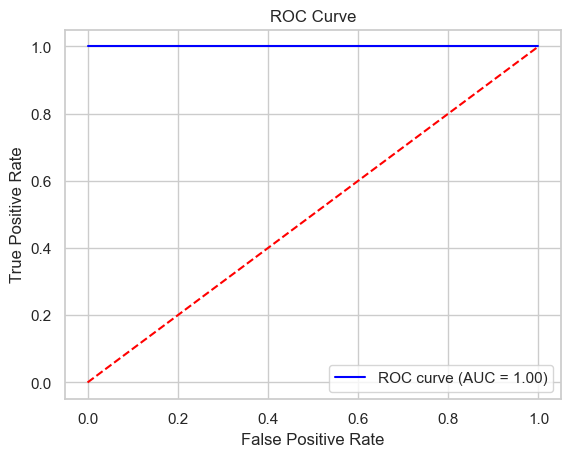

In [41]:
#ROC AUC CURVE
from sklearn.metrics import roc_auc_score, roc_curve, auc
from sklearn.preprocessing import label_binarize

#Get all classes
classes=np.unique(y_test)

# Binarize the true labels
y_test_bin = label_binarize(y_test, classes=classes)
n_classes=len(classes)

#Predict probabilities
y_prob = MODEL.predict_proba(x_test_scaled)

# Calculate ROC AUC score
roc_auc = roc_auc_score(y_test_bin, y_prob, average='macro', multi_class='ovr')
print("ROC AUC Score:", roc_auc)

# Plot ROC Curve
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# 5. Compute macro-average ROC curve
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))
mean_tpr = np.zeros_like(all_fpr)

for i in range(n_classes):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

mean_tpr /= n_classes
macro_auc = auc(all_fpr, mean_tpr)

plt.figure()
plt.plot(all_fpr, mean_tpr, color='blue', label=f"ROC curve (AUC = {macro_auc:.2f})")
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

**STEP 6: DEPLOYMENT**

In [ ]:
#SAVE MODEL

In [42]:
import joblib 
joblib.dump(MODEL,"XGB.pkl")

['XGB.pkl']

In [43]:
joblib.dump(le,"labelen.pkl")

['labelen.pkl']

In [44]:
joblib.dump(tg1,"target1.pkl")

['target1.pkl']

In [45]:
joblib.dump(tg2,"target2.pkl")

['target2.pkl']

In [46]:
joblib.dump(tg3,"target3.pkl")

['target3.pkl']

In [47]:
joblib.dump(tg4,"target4.pkl")

['target4.pkl']

In [48]:
joblib.dump(scaler,"scaler.pkl")

['scaler.pkl']

In [49]:
import pandas as pd
import numpy as np
import joblib

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from category_encoders import TargetEncoder
from xgboost import XGBClassifier
from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.over_sampling import SMOTE

# Load your data
df = pd.read_csv("transactions-2025-05-19.csv")

# Drop irrelevant columns
df.drop(columns=["TRANSACTION_NUMBER", "INSTANCE_DATE", "GROUP_EN", "USAGE_EN", 
                 "PROCEDURE_AREA", "TOTAL_BUYER", "TOTAL_SELLER", "MASTER_PROJECT_EN"], inplace=True)

# Map target
target_map = {'Unit': 0, 'Building': 1, 'Land': 2}
df["PROP_TYPE_EN"] = df["PROP_TYPE_EN"].map(target_map)

y = df["PROP_TYPE_EN"]
X = df.drop(columns=["PROP_TYPE_EN"])

# Map and encode features
room_mapping = {"Studio": 0, "1 B/R": 1, "2 B/R": 2, "3 B/R": 3,
                "4 B/R": 4, "5 B/R": 5, "6 B/R": 6, "7 B/R": 7,
                "8 B/R": 8, "9 B/R": 9, "10 B/R": 10, "Missing": -1}
X["ROOMS_EN"] = X["ROOMS_EN"].map(room_mapping).fillna(-1)

X["IS_OFFPLAN_EN"] = X["IS_OFFPLAN_EN"].map({"Yes": 1, "No": 0})
X["IS_FREE_HOLD_EN"] = X["IS_FREE_HOLD_EN"].map({"Free Hold": 1, "Non Free Hold": 0})

for col in ['NEAREST_METRO_EN', 'NEAREST_MALL_EN', 'NEAREST_LANDMARK_EN', 'PROJECT_EN']:
    X[col] = X[col].notna().astype(int)

X = X.fillna(0)

# Remove outliers
def remove_outliers_iqr(data, columns):
    for col in columns:
        Q1 = data[col].quantile(0.25)
        Q3 = data[col].quantile(0.75)
        IQR = Q3 - Q1
        data = data[(data[col] >= Q1 - 1.5 * IQR) & (data[col] <= Q3 + 1.5 * IQR)]
    return data

numeric_cols = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
X = remove_outliers_iqr(X, numeric_cols)
y = y.loc[X.index]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Columns to encode
target_encode_cols = ['PROCEDURE_EN', 'AREA_EN', 'PROP_SB_TYPE_EN', 'PARKING']
remainder_cols = [col for col in X_train.columns if col not in target_encode_cols]

# Build full preprocessing + model pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('target', TargetEncoder(), target_encode_cols),
        ('scale', StandardScaler(), remainder_cols)
    ]
)

# Final pipeline with SMOTE (imbalance handling)
pipeline = ImbPipeline(steps=[
    ('preprocessing', preprocessor),
    ('smote', SMOTE(random_state=42)),
    ('classifier', XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42))
])

# Fit the full pipeline
pipeline.fit(X_train, y_train)

# Save it
joblib.dump(pipeline, "full_pipeline.pkl")


['full_pipeline.pkl']